Problem Statement:

Identify Fake Job Postings”

Import Libraries:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Load *Dataset*:

In [5]:
# Load the dataset (make sure the file path is correct)
df = pd.read_csv('fake_job_postings_sample.csv')

# Display first few rows to confirm
df.head()


,text,label
0,Looking for a software engineer with 5+ years ...,0
1,URGENT HIRING! Work from home opportunity. Ear...,1
2,Join our reputable law firm as a paralegal. Re...,0
3,Congratulations! You've been selected for a jo...,1
4,We are hiring a data analyst for our tech star...,0


Extract Features and Labels:

In [6]:
# 'text' column: job descriptions or full job post content
# 'label' column: 0 = real, 1 = fake
X = df['text']
y = df['label']


Text Preprocessing: TE-IDF Vectorization:

In [7]:
# Convert text data into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)


Split into Train and Test sets:

In [8]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


Train the classification Model:

In [9]:
# Initialize and train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Predict on Test Set:

In [10]:
# Predict fake/real labels for test data
y_pred = model.predict(X_test)


Generate and Plot Confusion Matrix

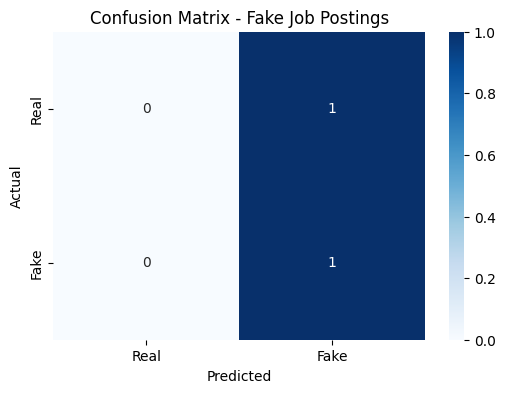

In [11]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fake Job Postings')
plt.show()


Print Evaluation Metrics:

In [12]:
# Show precision, recall, f1-score, and accuracy
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))


Classification Report:

              precision    recall  f1-score   support

        Real       0.00      0.00      0.00         1
        Fake       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
